In [ ]:
## 体验c的作用


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from  matplotlib.colors import ListedColormap
from sklearn import svm
from sklearn.datasets import make_circles,make_moons,make_blobs,make_classification

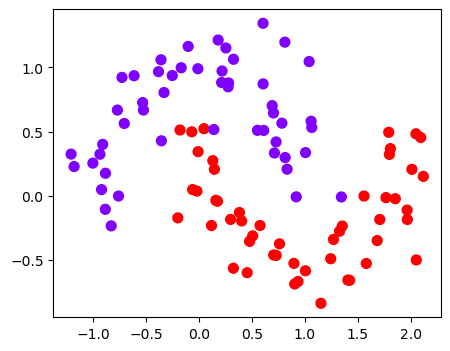

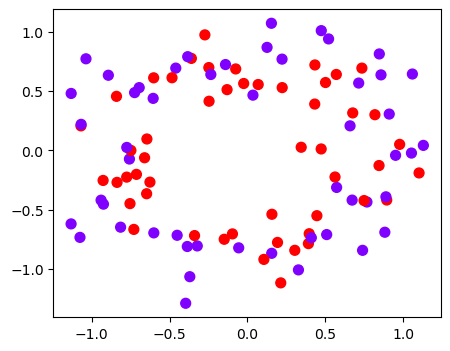

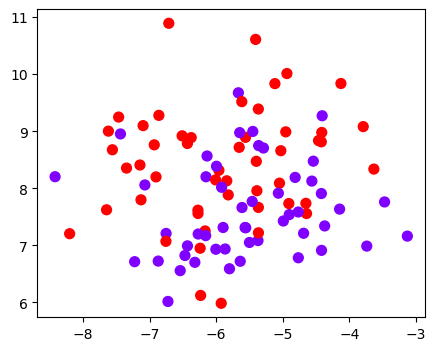

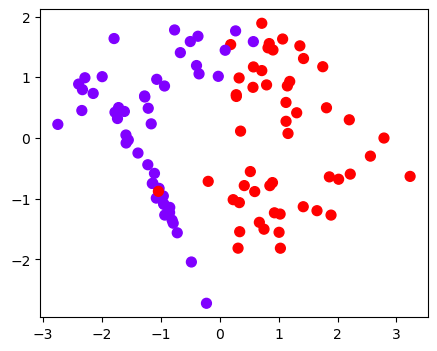

In [14]:
n_samples=100
datasets=[
    make_moons(n_samples=n_samples,noise=0.2,random_state=0)
    ,make_circles(n_samples=n_samples,noise=0.2,random_state=1)
    ,make_blobs(n_samples=n_samples,centers=2,random_state=5)
    ,make_classification(n_samples=n_samples,n_features=2,n_informative=2,n_redundant=0,random_state=5)]


kernels=['linear']

for X,Y in datasets:
    plt.figure(figsize=(5,4))
    plt.scatter(X[:,0],X[:,1],c=Y,s=50,cmap="rainbow")




                         

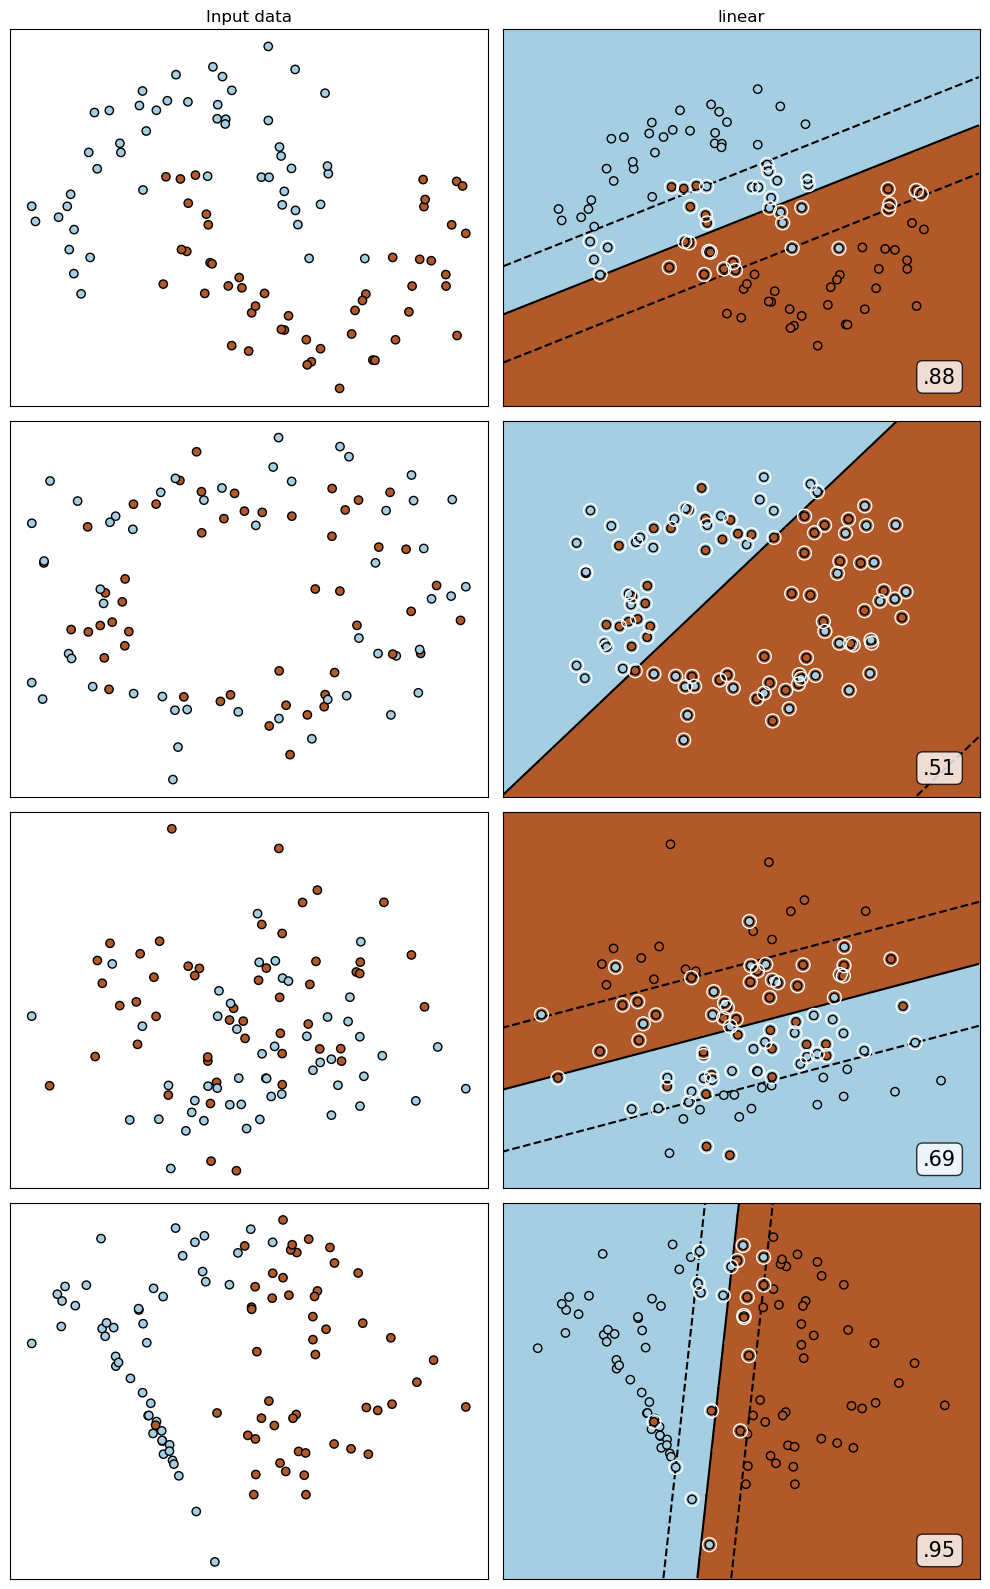

In [15]:
nrows = len(datasets)
ncols = len(kernels) + 1

fig, axes = plt.subplots(nrows, ncols, figsize=(10, 16))

for ds_cnt, (X, Y) in enumerate(datasets):
    ax = axes[ds_cnt, 0]
    if ds_cnt == 0:
        ax.set_title("Input data")
    ax.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired, edgecolors='k')
    ax.set_xticks(())
    ax.set_yticks(())

    for est_idx, kernel in enumerate(kernels):
        ax = axes[ds_cnt, est_idx + 1]
        clf = svm.SVC(kernel=kernel, gamma=2).fit(X, Y)
        score = clf.score(X, Y)
        ax.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired, edgecolors='k')
        ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, facecolors='none', zorder=10, edgecolors='white')
        x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
        y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
        XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
        Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)
        ax.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
        ax.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'], levels=[-1, 0, 1])
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(kernel)
        ax.text(0.95, 0.06, ('%.2f' % score).lstrip('0'),
                size=15,
                bbox=dict(boxstyle='round', alpha=0.8, facecolor='white'),
                transform=ax.transAxes,
                horizontalalignment='right')

plt.tight_layout()
plt.show()






## 处理样本不均衡问题

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn import svm
from sklearn.datasets import make_blobs



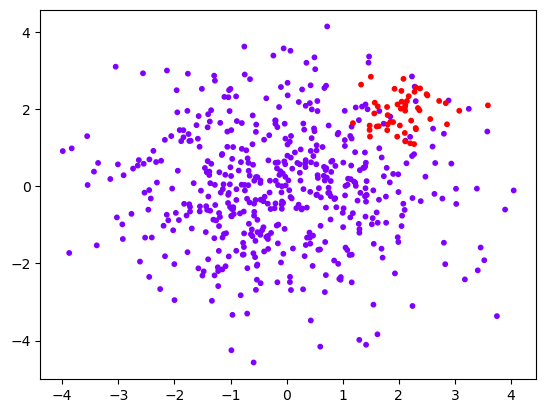

In [21]:
#创建样本不均衡的数据集
class_1=500
class_2=50
centers=[[0.0,0.0],[2.0,2.0]]
clusters_std=[1.5,0.5]#设置两数的方差

X,y=make_blobs(n_samples=[class_1,class_2]
               ,centers=centers
               ,cluster_std=clusters_std
               ,random_state=0
               ,shuffle=False)
plt.scatter(X[:,0],X[:,1],c=y,cmap="rainbow",s=10)

In [24]:
#在数据集上建模
#不设定class_weight
clf=svm.SVC(kernel="linear",C=1.0)
clf.fit(X,y)



#设定class_weight
wclf=svm.SVC(kernel='linear',class_weight={1:10})
wclf.fit(X,y)



clf.score(X,y)


0.9418181818181818

In [26]:
wclf.score(X,y)

0.9127272727272727

C:\Users\DIAO\AppData\Local\Temp\ipykernel_8084\146269851.py:28: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  plt.legend([a.collections[0], b.collections[0]], ["non weighted", "weighted"], loc="upper right")


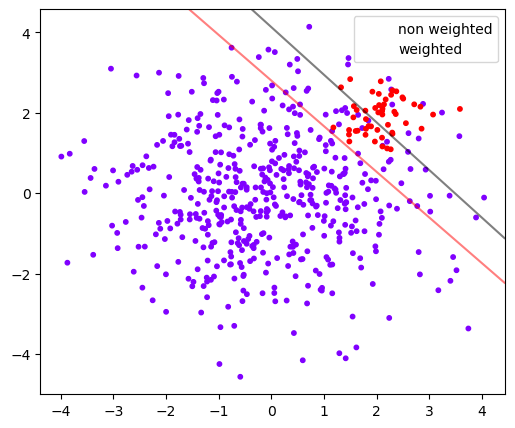

In [37]:
#绘制出模型给出的决策边界

plt.figure(figsize=(6,5))
plt.scatter(X[:,0],X[:,1],c=y,cmap="rainbow",s=10)
ax=plt.gca()#获取当前子图

#绘制网格图片
xlim=ax.get_xlim()
ylim=ax.get_ylim()

xx=np.linspace(xlim[0],xlim[1],30)
yy=np.linspace(ylim[0],ylim[1],30)
YY,XX=np.meshgrid(yy,xx)
xy=np.vstack([XX.ravel(),YY.ravel()]).T



# 绘制决策边界
Z_clf = clf.decision_function(xy).reshape(XX.shape)
a = ax.contour(XX, YY, Z_clf, colors='black', levels=[0], alpha=0.5, linestyles=['-'])

# 绘制决策边界
Z_wclf = wclf.decision_function(xy).reshape(XX.shape)
b = ax.contour(XX, YY, Z_wclf, colors='red', levels=[0], alpha=0.5, linestyles=['-'])


## 图例
plt.legend([a.collections[0], b.collections[0]], ["non weighted", "weighted"], loc="upper right")
plt.show()